In [1]:
%matplotlib nbagg
import hyperspy.api as hys
import numpy as np
import tkinter.filedialog as tkf

In [2]:
# 1) prepare EELS data (low loss and core loss)
hl = hys.load(tkf.askopenfilename(), signal_type = "EELS")
ll = hys.load(tkf.askopenfilename(), signal_type = "EELS")
print(hl)
print(ll)

<EELSSpectrum, title: 01_EELS_SI_core loss, dimensions: (30, 135|2048)>
<EELSSpectrum, title: 01_EELS_SI_low loss, dimensions: (30, 135|2048)>


In [3]:
hl_line = np.sum(hl.data, axis=0)
print(hl_line.shape)
ll_line = np.sum(ll.data, axis=0)
print(ll_line.shape)

(30, 2048)
(30, 2048)


In [4]:
# integrate signals line by line (x-direction)

hlc = hys.signals.EELSSpectrum(hl_line)
hlc.metadata = hl.metadata

hlc.axes_manager[0].name = hl.axes_manager[0].name
hlc.axes_manager[0].size = hl.axes_manager[0].size
hlc.axes_manager[0].index = hl.axes_manager[0].index
hlc.axes_manager[0].offset = hl.axes_manager[0].offset
hlc.axes_manager[0].scale = hl.axes_manager[0].scale
hlc.axes_manager[0].units = hl.axes_manager[0].units

hlc.axes_manager[1].name = hl.axes_manager[2].name
hlc.axes_manager[1].size = hl.axes_manager[2].size
hlc.axes_manager[1].offset = hl.axes_manager[2].offset
hlc.axes_manager[1].scale = hl.axes_manager[2].scale
hlc.axes_manager[1].units = hl.axes_manager[2].units

llc = hys.signals.EELSSpectrum(ll_line)
llc.metadata = ll.metadata

llc.axes_manager[0].name = ll.axes_manager[0].name
llc.axes_manager[0].size = ll.axes_manager[0].size
llc.axes_manager[0].index = ll.axes_manager[0].index
llc.axes_manager[0].offset = ll.axes_manager[0].offset
llc.axes_manager[0].scale = ll.axes_manager[0].scale
llc.axes_manager[0].units = ll.axes_manager[0].units

llc.axes_manager[1].name = ll.axes_manager[2].name
llc.axes_manager[1].size = ll.axes_manager[2].size
llc.axes_manager[1].offset = ll.axes_manager[2].offset
llc.axes_manager[1].scale = ll.axes_manager[2].scale
llc.axes_manager[1].units = ll.axes_manager[2].units

In [ ]:
hlc = hl
llc = ll

In [4]:
hl_2d = np.sum(hl.data, axis=2)
print(hl_2d.shape)

(135, 30)


<IPython.core.display.Javascript object>


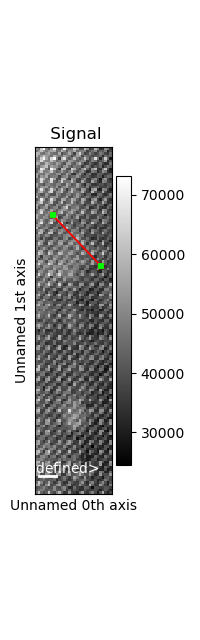

<BaseSignal, title: , dimensions: (|30)>

In [7]:
hl_2d = hys.signals.Signal2D(hl_2d)
line = hys.roi.Line2DROI(x1=10, y1=10, x2=30, y2=30)
hl_2d.plot()
line.interactive(hl_2d, color="red")

In [ ]:
hl_2d = hys.signals.Signal2D(hl_2d)
roi = hys.roi.RectangularROI(left=10, right=50, top=10, bottom=50)
hl_2d.plot()
roi.interactive(hl_2d, color="red")

In [ ]:
# crop the image (rectangle)
roi_pos = [int(roi.y), int(roi.y+roi.height), int(roi.x), int(roi.x+roi.width)]
print(roi_pos)

hlc = hys.signals.EELSSpectrum(hl.data[roi_pos[0]:roi_pos[1], roi_pos[2]:roi_pos[3], :])
hlc.metadata = hl.metadata

hlc.axes_manager[0].name = hl.axes_manager[0].name
hlc.axes_manager[0].size = roi_pos[3] - roi_pos[2]
hlc.axes_manager[0].index = roi_pos[3] - roi_pos[2] - 1
hlc.axes_manager[0].offset = hl.axes_manager[0].offset
hlc.axes_manager[0].scale = hl.axes_manager[0].scale
hlc.axes_manager[0].units = hl.axes_manager[0].units

hlc.axes_manager[1].name = hl.axes_manager[1].name
hlc.axes_manager[1].size = roi_pos[1] - roi_pos[0]
hlc.axes_manager[1].index = roi_pos[1] - roi_pos[0] - 1
hlc.axes_manager[1].offset = hl.axes_manager[1].offset
hlc.axes_manager[1].scale = hl.axes_manager[1].scale
hlc.axes_manager[1].units = hl.axes_manager[1].units

hlc.axes_manager[2].name = hl.axes_manager[2].name
hlc.axes_manager[2].size = hl.axes_manager[2].size
hlc.axes_manager[2].offset = hl.axes_manager[2].offset
hlc.axes_manager[2].scale = hl.axes_manager[2].scale
hlc.axes_manager[2].units = hl.axes_manager[2].units


llc = hys.signals.EELSSpectrum(ll.data[roi_pos[0]:roi_pos[1], roi_pos[2]:roi_pos[3], :])
llc.metadata = ll.metadata

llc.axes_manager[0].name = ll.axes_manager[0].name
llc.axes_manager[0].size = roi_pos[3] - roi_pos[2]
llc.axes_manager[0].index = roi_pos[3] - roi_pos[2] - 1
llc.axes_manager[0].offset = ll.axes_manager[0].offset
llc.axes_manager[0].scale = ll.axes_manager[0].scale
llc.axes_manager[0].units = ll.axes_manager[0].units

llc.axes_manager[1].name = ll.axes_manager[1].name
llc.axes_manager[1].size = roi_pos[1] - roi_pos[0]
llc.axes_manager[1].index = roi_pos[1] - roi_pos[0] - 1
llc.axes_manager[1].offset = ll.axes_manager[1].offset
llc.axes_manager[1].scale = ll.axes_manager[1].scale
llc.axes_manager[1].units = ll.axes_manager[1].units

llc.axes_manager[2].name = ll.axes_manager[2].name
llc.axes_manager[2].size = ll.axes_manager[2].size
llc.axes_manager[2].offset = ll.axes_manager[2].offset
llc.axes_manager[2].scale = ll.axes_manager[2].scale
llc.axes_manager[2].units = ll.axes_manager[2].units

print(hlc)
print(hlc.axes_manager)
print(llc)
print(llc.axes_manager)

In [ ]:
# crop the image (x-direction line)
roi_pos = [int(roi.y), int(roi.y+roi.height), int(roi.x), int(roi.x+roi.width)]
print(roi_pos)

hlc = hys.signals.EELSSpectrum(hl.data[roi_pos[0]:roi_pos[1], roi_pos[2]:roi_pos[3], :].squeeze(axis=0))
hlc.metadata = hl.metadata

hlc.axes_manager[0].name = hl.axes_manager[0].name
hlc.axes_manager[0].size = roi_pos[3] - roi_pos[2]
hlc.axes_manager[0].index = roi_pos[3] - roi_pos[2] - 1
hlc.axes_manager[0].offset = hl.axes_manager[0].offset
hlc.axes_manager[0].scale = hl.axes_manager[0].scale
hlc.axes_manager[0].units = hl.axes_manager[0].units

#hlc.axes_manager[1].name = hl.axes_manager[1].name
#hlc.axes_manager[1].size = roi_pos[1] - roi_pos[0]
#hlc.axes_manager[1].index = roi_pos[1] - roi_pos[0] - 1
#hlc.axes_manager[1].offset = hl.axes_manager[1].offset
#hlc.axes_manager[1].scale = hl.axes_manager[1].scale
#hlc.axes_manager[1].units = hl.axes_manager[1].units

hlc.axes_manager[1].name = hl.axes_manager[2].name
hlc.axes_manager[1].size = hl.axes_manager[2].size
hlc.axes_manager[1].offset = hl.axes_manager[2].offset
hlc.axes_manager[1].scale = hl.axes_manager[2].scale
hlc.axes_manager[1].units = hl.axes_manager[2].units


llc = hys.signals.EELSSpectrum(ll.data[roi_pos[0]:roi_pos[1], roi_pos[2]:roi_pos[3], :].squeeze(axis=0))
llc.metadata = ll.metadata

llc.axes_manager[0].name = ll.axes_manager[0].name
llc.axes_manager[0].size = roi_pos[3] - roi_pos[2]
llc.axes_manager[0].index = roi_pos[3] - roi_pos[2] - 1
llc.axes_manager[0].offset = ll.axes_manager[0].offset
llc.axes_manager[0].scale = ll.axes_manager[0].scale
llc.axes_manager[0].units = ll.axes_manager[0].units

#llc.axes_manager[1].name = ll.axes_manager[1].name
#llc.axes_manager[1].size = roi_pos[1] - roi_pos[0]
#llc.axes_manager[1].index = roi_pos[1] - roi_pos[0] - 1
#llc.axes_manager[1].offset = ll.axes_manager[1].offset
#llc.axes_manager[1].scale = ll.axes_manager[1].scale
#llc.axes_manager[1].units = ll.axes_manager[1].units

llc.axes_manager[1].name = ll.axes_manager[2].name
llc.axes_manager[1].size = ll.axes_manager[2].size
llc.axes_manager[1].offset = ll.axes_manager[2].offset
llc.axes_manager[1].scale = ll.axes_manager[2].scale
llc.axes_manager[1].units = ll.axes_manager[2].units

print(hlc)
print(hlc.axes_manager)
print(llc)
print(llc.axes_manager)

In [5]:
# 2) ZLP align
llc.align_zero_loss_peak(subpixel=True, also_align=[hlc])


Initial ZLP position statistics
-------------------------------
Summary statistics
------------------
mean:	0
std:	0

min:	0
Q1:	0
median:	0
Q3:	0
max:	0


<IPython.core.display.Javascript object>


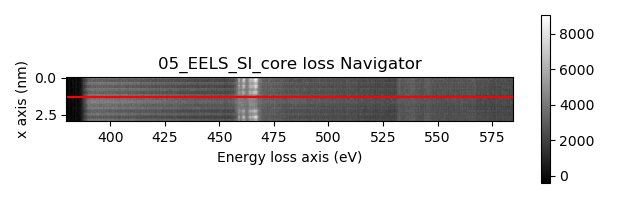

<IPython.core.display.Javascript object>


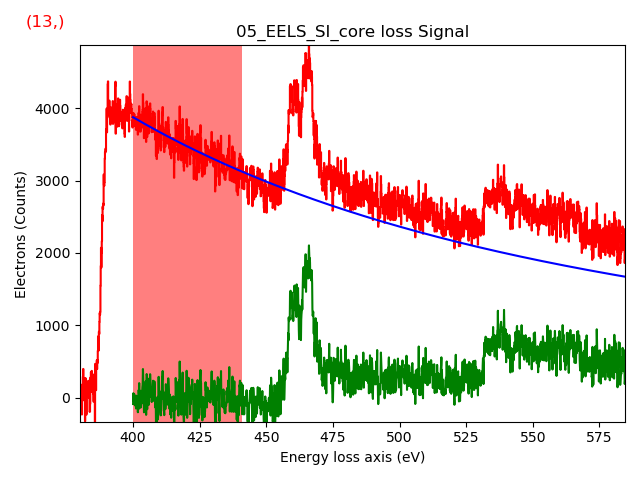

<IPython.core.display.Javascript object>


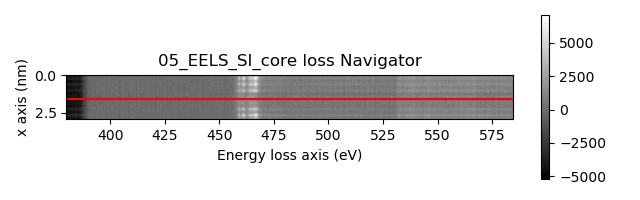

<IPython.core.display.Javascript object>


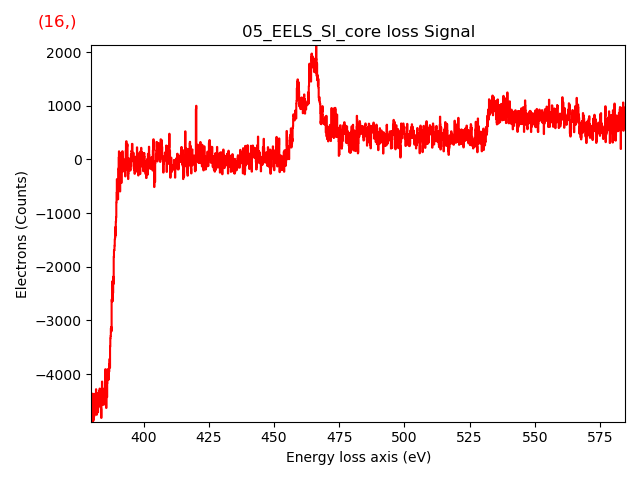

In [6]:
# 3) remove background
hlc.remove_background()

<IPython.core.display.Javascript object>


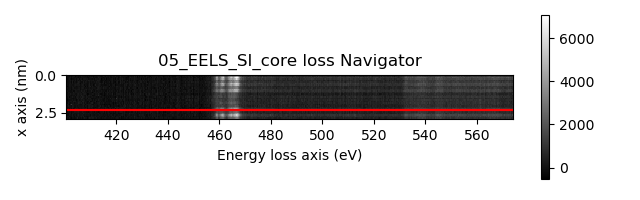

<IPython.core.display.Javascript object>


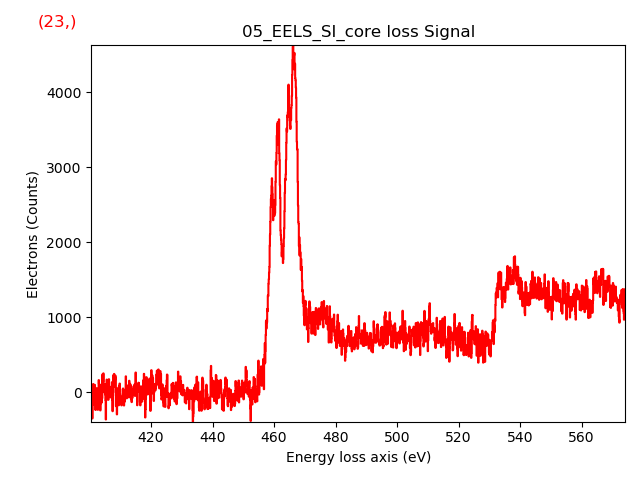

In [12]:
hlc.crop_signal1D()

In [15]:
# 4) Fourier ratio deconvolution
hl_deconv = hlc.fourier_ratio_deconvolution(llc, extrapolate_coreloss=False)

<IPython.core.display.Javascript object>


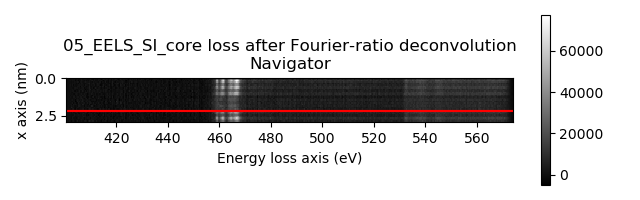

<IPython.core.display.Javascript object>


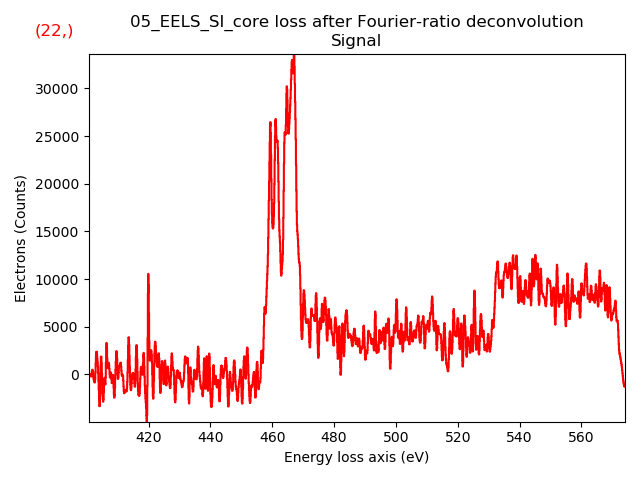

In [16]:
hl_deconv.plot()

In [ ]:
hl_deconv.metadata

<IPython.core.display.Javascript object>


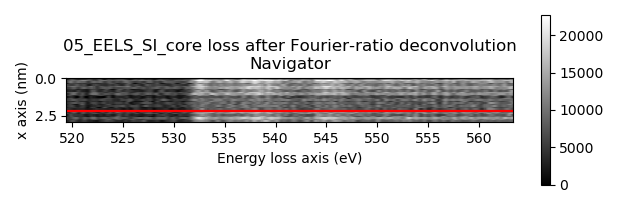

<IPython.core.display.Javascript object>


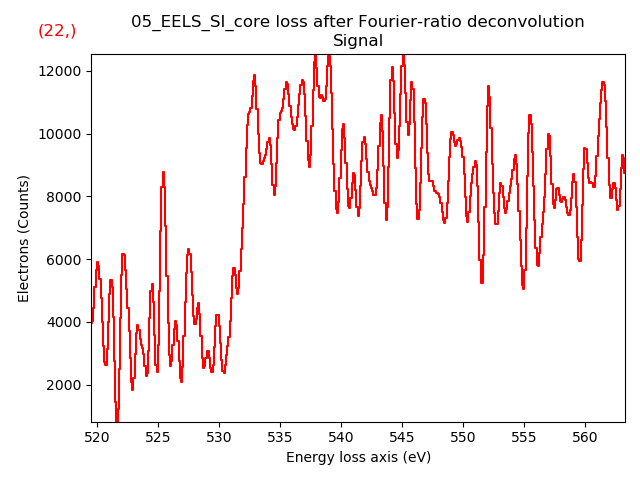

In [17]:
# crop 1D signals
hl_deconv.crop_signal1D()

In [18]:
# 5) add elements
hl_deconv.add_elements(("O",))

In [19]:
# 6) create a fitting model
model = hl_deconv.create_model(ll=llc, auto_background=False)
print(model.components)

   # |      Attribute Name |      Component Name |      Component Type
---- | ------------------- | ------------------- | -------------------
   0 |                 O_K |                 O_K |          EELSCLEdge


In [20]:
# 7) fit the model
model.multifit(kind="smart")

<IPython.core.display.Javascript object>


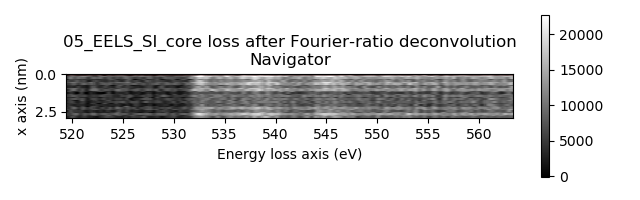

<IPython.core.display.Javascript object>


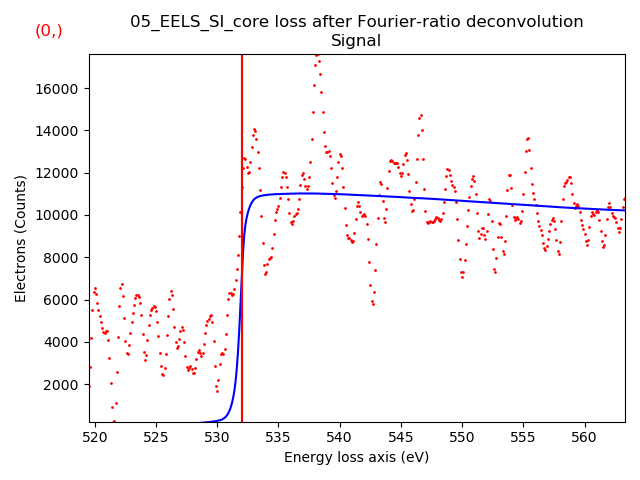

In [21]:
model.plot()
model.enable_adjust_position()

In [ ]:
print(model.components.Ti_L3.onset_energy.value)
print(model.components.Ti_L2.onset_energy.value)
print(model.components.Ti_L1.onset_energy.value)
print(model.components.O_K.onset_energy.value)

In [22]:
model.enable_fine_structure()
model.multifit(kind="smart")

<IPython.core.display.Javascript object>


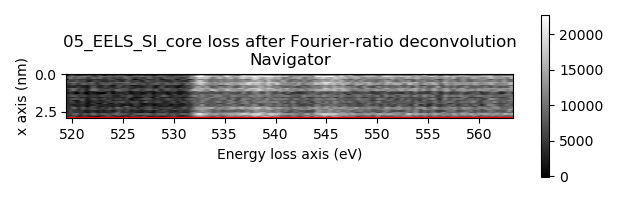

<IPython.core.display.Javascript object>


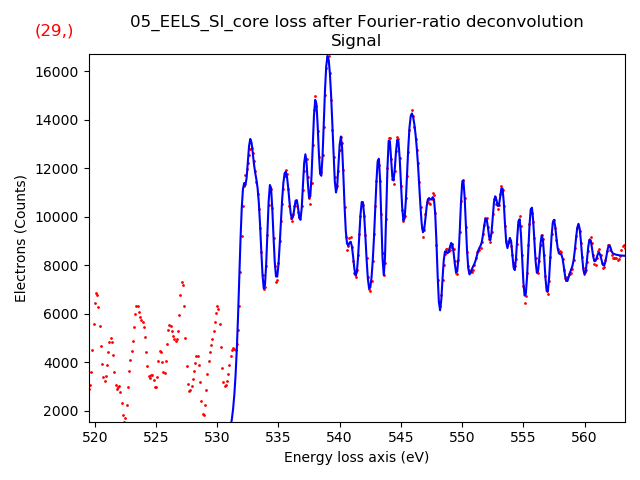

In [23]:
model.plot()

In [24]:
model.components.O_K.intensity.bmin = 0.0
model.multifit(fitter="leastsq", kind="smart", bounded=True)

<IPython.core.display.Javascript object>


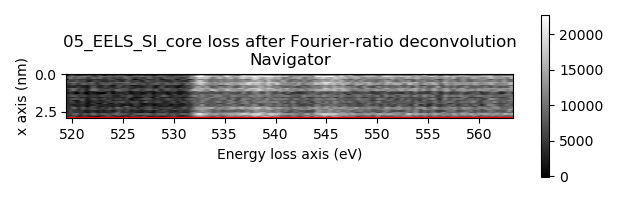

<IPython.core.display.Javascript object>


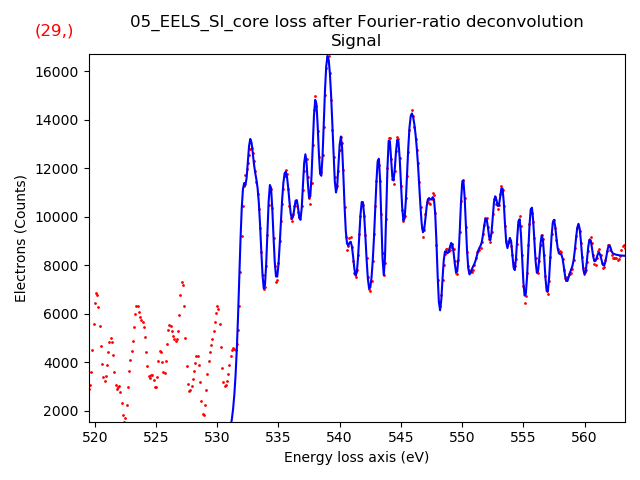

In [25]:
model.plot()

In [ ]:
roi = hys.roi.SpanROI(left=750, right=800)
model.plot()
roi.add_widget(model, axes=["Energy loss"])

In [ ]:
co_l3 = model.as_signal().isig[roi].integrate1D(axis="Energy loss")
print(co_l3.data)

In [ ]:
roi = hys.roi.SpanROI(left=750, right=800)
model.plot()
roi.add_widget(model, axes=["Energy loss"])

In [ ]:
co_l2 = model.as_signal().isig[roi].integrate1D(axis="Energy loss")
print(co_l2.data)

In [ ]:
wl_ratio = co_l3 / co_l2
print(wl_ratio.data)